<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_2_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,90.127961,65.304287,85.298878,0.000014,250.731140,250.731134,0.000006
1,0.0,1.0,75.099564,59.226925,66.924609,-0.000146,211.250951,211.251117,-0.000165
2,0.0,2.0,77.572841,70.494398,89.599707,0.000029,247.666975,247.666933,0.000042
3,0.0,3.0,89.302469,75.606915,70.850746,-0.000009,245.760121,245.760147,-0.000027
4,0.0,4.0,26.221471,65.445422,91.404974,-0.000044,193.071823,193.071805,0.000018
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,68.271902,36.557110,53.368208,0.000047,168.197267,168.197392,-0.000125
29996,999.0,26.0,91.838727,41.951685,57.843097,-0.000102,201.633407,201.633629,-0.000222
29997,999.0,27.0,98.797809,87.344123,71.955339,-0.000008,268.097263,268.097177,0.000086
29998,999.0,28.0,41.041488,59.485003,39.933158,0.000057,150.459706,150.459737,-0.000032


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    90.127961  65.304287  85.298878  ...  250.731140  250.731134  0.000006
      1.0    75.099564  59.226925  66.924609  ...  211.250951  211.251117 -0.000165
      2.0    77.572841  70.494398  89.599707  ...  247.666975  247.666933  0.000042
      3.0    89.302469  75.606915  70.850746  ...  245.760121  245.760147 -0.000027
      4.0    26.221471  65.445422  91.404974  ...  193.071823  193.071805  0.000018
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   68.271902  36.557110  53.368208  ...  168.197267  168.197392 -0.000125
      26.0   91.838727  41.951685  57.843097  ...  201.633407  201.633629 -0.000222
      27.0   98.797809  87.344123  71.955339  ...  268.097263  268.097177  0.000086
      28.0   41.041488  59.485003  39.933158  ...  150.459706  150.459737 -0.000032
      29.0   92.237168  75.364593  87.330660  ...  264.932447  264.932401  0.000045

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    90.127961  65.304287  85.298878  ...  250.731140  250.731134  0.000006
      1.0    75.099564  59.226925  66.924609  ...  211.250951  211.251117 -0.000165
      2.0    77.572841  70.494398  89.599707  ...  247.666975  247.666933  0.000042
      3.0    89.302469  75.606915  70.850746  ...  245.760121  245.760147 -0.000027
      4.0    26.221471  65.445422  91.404974  ...  193.071823  193.071805  0.000018
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   68.271902  36.557110  53.368208  ...  168.197267  168.197392 -0.000125
      26.0   91.838727  41.951685  57.843097  ...  201.633407  201.633629 -0.000222
      27.0   98.797809  87.344123  71.955339  ...  268.097263  268.097177  0.000086
      28.0   41.041488  59.485003  39.933158  ...  150.459706  150.459737 -0.000032
      29.0   92.237168  75.364593  87.330660  ...  264.932447  264.932401  0.000045

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,90.127961,65.304287,85.298878,0.000014,250.731140,250.731134,0.000006
1,0.0,1.0,75.099564,59.226925,66.924609,-0.000146,211.250951,211.251117,-0.000165
2,0.0,2.0,77.572841,70.494398,89.599707,0.000029,247.666975,247.666933,0.000042
3,0.0,3.0,89.302469,75.606915,70.850746,-0.000009,245.760121,245.760147,-0.000027
4,0.0,4.0,26.221471,65.445422,91.404974,-0.000044,193.071823,193.071805,0.000018
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,68.271902,36.557110,53.368208,0.000047,168.197267,168.197392,-0.000125
29996,999.0,26.0,91.838727,41.951685,57.843097,-0.000102,201.633407,201.633629,-0.000222
29997,999.0,27.0,98.797809,87.344123,71.955339,-0.000008,268.097263,268.097177,0.000086
29998,999.0,28.0,41.041488,59.485003,39.933158,0.000057,150.459706,150.459737,-0.000032


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    90.127961  65.304287  85.298878  ...  250.731140  250.731134  0.000006
      1.0    75.099564  59.226925  66.924609  ...  211.250951  211.251117 -0.000165
      2.0    77.572841  70.494398  89.599707  ...  247.666975  247.666933  0.000042
      3.0    89.302469  75.606915  70.850746  ...  245.760121  245.760147 -0.000027
      4.0    26.221471  65.445422  91.404974  ...  193.071823  193.071805  0.000018
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   68.271902  36.557110  53.368208  ...  168.197267  168.197392 -0.000125
      26.0   91.838727  41.951685  57.843097  ...  201.633407  201.633629 -0.000222
      27.0   98.797809  87.344123  71.955339  ...  268.097263  268.097177  0.000086
      28.0   41.041488  59.485003  39.933158  ...  150.459706  150.459737 -0.000032
      29.0   92.237168  75.364593  87.330660  ...  264.932447  264.932401  0.000045

[30000 rows x 7 columns]

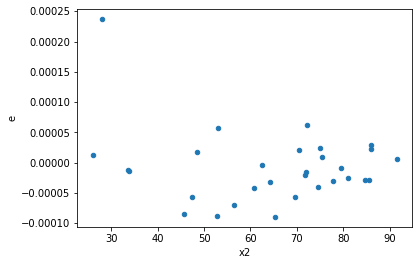

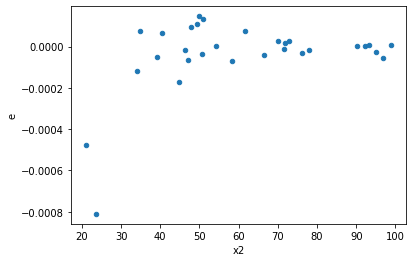

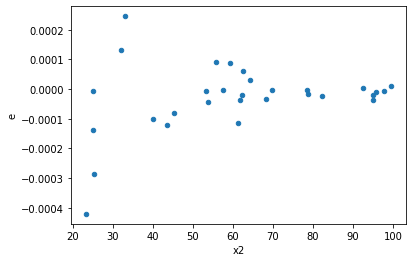

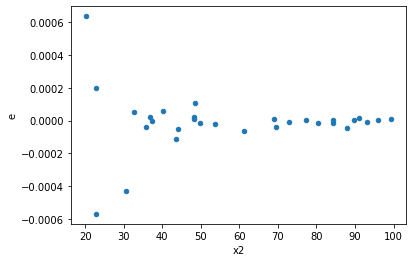

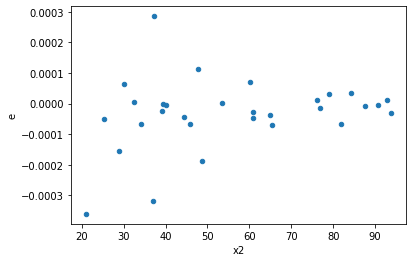

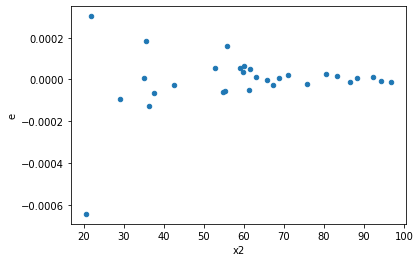

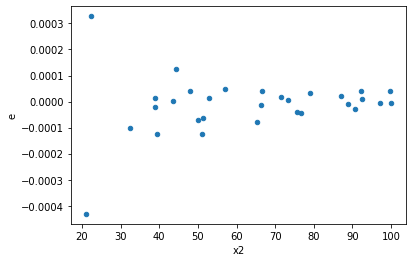

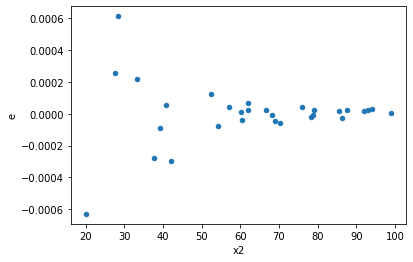

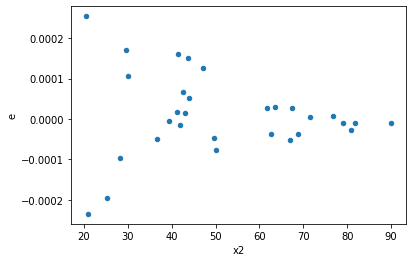

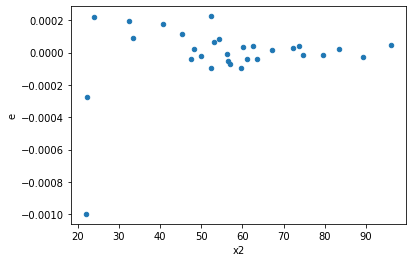

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
2.0,17.0,7.0,1.0003255425438388e-07,8.364297514298716e-08,6.252034640898992e-09,1.3940495857164527e-08,2.030668327396695,0.22069819429812454,0.8896509028509377,Reject005=1 : Homoscedasticity
3.0,16.0,8.0,8.639421670924356e-08,2.120011941912477e-07,5.759614447282904e-09,3.0285884884463955e-08,4.907763557941144,0.006704672023641889,0.9966476639881791,Reject005=0 : Heteroscedasticity
5.0,12.0,12.0,1.2987300083892117e-08,4.6848834012572377e-07,1.1806636439901925e-09,4.258984910233852e-08,36.072804747676564,3.1666139888031353e-07,0.9999998416693006,Reject005=0 : Heteroscedasticity
7.0,10.0,14.0,1.8218152445709043e-07,3.2975869861728537e-07,2.024239160634338e-08,2.5366053739791182e-08,1.2928968965744545,0.6942326534920764,0.6528836732539618,Reject005=1 : Homoscedasticity
8.0,11.0,13.0,9.785092156582654e-08,2.0277214349130563e-06,9.785092156582654e-09,1.689767862427547e-07,17.534472477359806,3.4359626161828416e-05,0.9999828201869191,Reject005=0 : Heteroscedasticity
9.0,10.0,14.0,5.5552072957836824e-08,1.5013708588899228e-06,6.172452550870758e-09,1.154900660684556e-07,19.304549753955822,4.460248862780958e-05,0.9999776987556861,Reject005=0 : Heteroscedasticity
10.0,7.0,17.0,7.879560077904866e-09,7.325083697253765e-08,1.3132600129841443e-09,4.578177310783603e-09,3.8278925528102703,0.07814654474737326,0.9609267276263134,Reject005=1 : Homoscedasticity
12.0,19.0,5.0,1.4145929603814852e-07,1.0842562012594037e-07,7.85884977989714e-09,2.7106405031485093e-08,2.9126212841286954,0.08140862619258193,0.959295686903709,Reject005=1 : Homoscedasticity
14.0,13.0,11.0,8.595988466564377e-08,2.42466648370204e-07,7.16332372213698e-09,2.42466648370204e-08,3.333549069348055,0.04266121143238166,0.9786693942838092,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,16.0,8.0,3.4441086890486224e-07,7.519661160250609e-08,2.296072459365748e-08,1.0742373086072298e-08,0.4366680519788004,0.23645409447358018,Reject005=1 : Homoscedasticity
1.0,9.0,15.0,8.760051969622971e-08,1.313810978529255e-07,1.0950064962028714e-08,9.384364132351821e-09,0.8998651946941366,0.8226140947741888,Reject005=1 : Homoscedasticity
2.0,17.0,7.0,1.0003255425438388e-07,8.364297514298716e-08,6.252034640898992e-09,1.3940495857164527e-08,2.030668327396695,0.22069819429812454,Reject005=1 : Homoscedasticity
3.0,16.0,8.0,8.639421670924356e-08,2.120011941912477e-07,5.759614447282904e-09,3.0285884884463955e-08,4.907763557941144,0.006704672023641889,Reject005=0 : Heteroscedasticity
4.0,8.0,16.0,7.061448411234611e-07,2.191892577721559e-08,1.0087783444620873e-07,1.4612617184810393e-09,0.015520134468689918,2.0529764969914291e-10,Reject005=0 : Heteroscedasticity
5.0,12.0,12.0,1.2987300083892117e-08,4.6848834012572377e-07,1.1806636439901925e-09,4.258984910233852e-08,36.072804747676564,3.1666139888031353e-07,Reject005=0 : Heteroscedasticity
6.0,13.0,11.0,2.156460847760098e-07,1.1961288608988794e-07,1.7970507064667482e-08,1.1961288608988794e-08,0.6555216789936488,0.48956865773142905,Reject005=1 : Homoscedasticity
7.0,10.0,14.0,1.8218152445709043e-07,3.2975869861728537e-07,2.024239160634338e-08,2.5366053739791182e-08,1.2928968965744545,1.3057673465079236,Reject005=1 : Homoscedasticity
8.0,11.0,13.0,9.785092156582654e-08,2.0277214349130563e-06,9.785092156582654e-09,1.689767862427547e-07,17.534472477359806,3.4359626161828416e-05,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    698
Reject005=1 : Homoscedasticity      302
Name: Result_test, dtype: int64